In [34]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/ner-data/ner.csv')
all_labels = []
for lst in df.labels.str.split(' '):
    for i, el in enumerate(lst):
        if len(el) > 1:
            lst[i] = el[2:]
    all_labels += lst
cntr = Counter(all_labels)
cntr

Counter({'O': 887908,
         'geo': 45058,
         'org': 36927,
         'per': 34241,
         'tim': 26861,
         'gpe': 16068,
         'art': 699,
         'eve': 561,
         'nat': 252})

**Correlation of classes in the dataset**

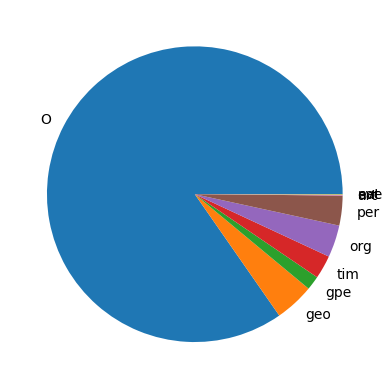

In [35]:
plt.pie([float(v) for v in cntr.values()], labels=[k for k in cntr],
           autopct=None)
plt.show()

**Number of meetings between classes**

The ration between pair wise occurrence and all occurences. For example if *geo* and *gpe* each time occurence together it is 1, if never then 0

Index(['O', 'geo', 'gpe', 'tim', 'org', 'per', 'art', 'nat', 'eve'], dtype='object')


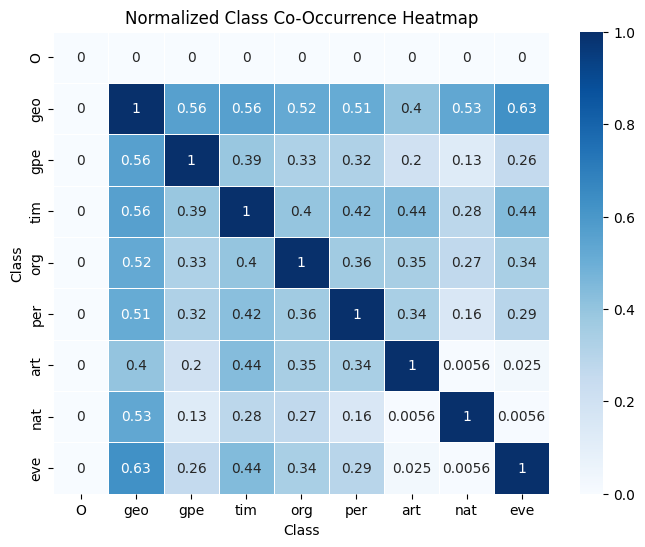

In [43]:
keys = cntr.keys()
data = []
for lst in df.labels.str.split(' '):
    for i, el in enumerate(lst):
        if len(el) > 1:
            lst[i] = el[2:]
    lst = list(set(filter(lambda a: a != 'O', lst)))
    data.append(lst)
df_classes = pd.DataFrame(0, index=range(len(data)), columns=keys)

# Populate the DataFrame: 1 if class appears in the row, otherwise 0
for i, lst in enumerate(data):
    for cls in lst:
        df_classes.loc[i, cls] = 1

# Compute the co-occurrence matrix using dot product
co_occurrence_matrix = df_classes.T.dot(df_classes)
print(co_occurrence_matrix.keys())
class_occurrences = np.diag(co_occurrence_matrix)

# Normalize the co-occurrence matrix
normalized_matrix = np.zeros_like(co_occurrence_matrix, dtype=float)

for i in range(len(keys)):
    for j in range(len(keys)):
        if class_occurrences[i] > 0 and class_occurrences[j] > 0:
            # Normalize by the minimum of the total occurrences of class i and class j
            normalized_matrix[i, j] = co_occurrence_matrix[list(keys)[i]][list(keys)[j]] / min(class_occurrences[i], class_occurrences[j])

# Convert normalized matrix back to a DataFrame for easier plotting
normalized_df = pd.DataFrame(normalized_matrix, index=keys, columns=keys)

# Plot the normalized co-occurrence matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_df, annot=True, cmap="Blues", cbar=True, linewidths=0.5)

# Add labels and title
plt.title("Normalized Class Co-Occurrence Heatmap")
plt.xlabel("Class")
plt.ylabel("Class")
plt.show()